# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from pprint import pprint
import scipy.stats as sc
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import json
import time

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        if (response.status_code == 200):
            # Extract data
            city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat", None)
        city_lng = city_weather.get("coord", {}).get("lon", None)
        city_max_temp = city_weather.get("main", {}).get("temp_max", None)
        city_humidity = city_weather.get("main", {}).get("humidity", None)
        city_clouds = city_weather.get("clouds", {}).get("all", None)
        city_wind = city_weather.get("wind", {}).get("speed", None)
        city_country = city_weather.get("sys", {}).get("country", None)
        city_date = city_weather.get("dt", None)
        city = city_weather.get("name", None)
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port augusta
Processing Record 2 of Set 1 | menaka
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | fort stockton
Processing Record 5 of Set 1 | codrington
Processing Record 6 of Set 1 | smithers
Processing Record 7 of Set 1 | utrik
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | la cruz
Processing Record 10 of Set 1 | yajiwa
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | nogliki
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | gharghoda
Processing Record 15 of Set 1 | kone
Processing Record 16 of Set 1 | sao tome
Processing Record 17 of Set 1 | polyarnyy
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | dudinka
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | salinopolis
Processing Record 22 of Set 1 | olonkinbyen
Processing Record 23 of S

In [32]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [33]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Augusta,-32.5000,137.7667,29.57,25,70,7.82,AU,1735544123
1,Ménaka,15.9182,2.4022,20.01,14,5,5.73,ML,1735544124
2,Puerto Ayora,-0.7393,-90.3518,23.64,97,78,1.90,EC,1735544126
3,Fort Stockton,30.8940,-102.8793,18.20,22,0,5.66,US,1735544127
4,Codrington,-38.2667,141.9667,19.93,66,100,6.84,AU,1735544128


In [34]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [35]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Port Augusta,-32.5000,137.7667,29.57,25,70,7.82,AU,1735544123
1,Ménaka,15.9182,2.4022,20.01,14,5,5.73,ML,1735544124
2,Puerto Ayora,-0.7393,-90.3518,23.64,97,78,1.90,EC,1735544126
3,Fort Stockton,30.8940,-102.8793,18.20,22,0,5.66,US,1735544127
4,Codrington,-38.2667,141.9667,19.93,66,100,6.84,AU,1735544128


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

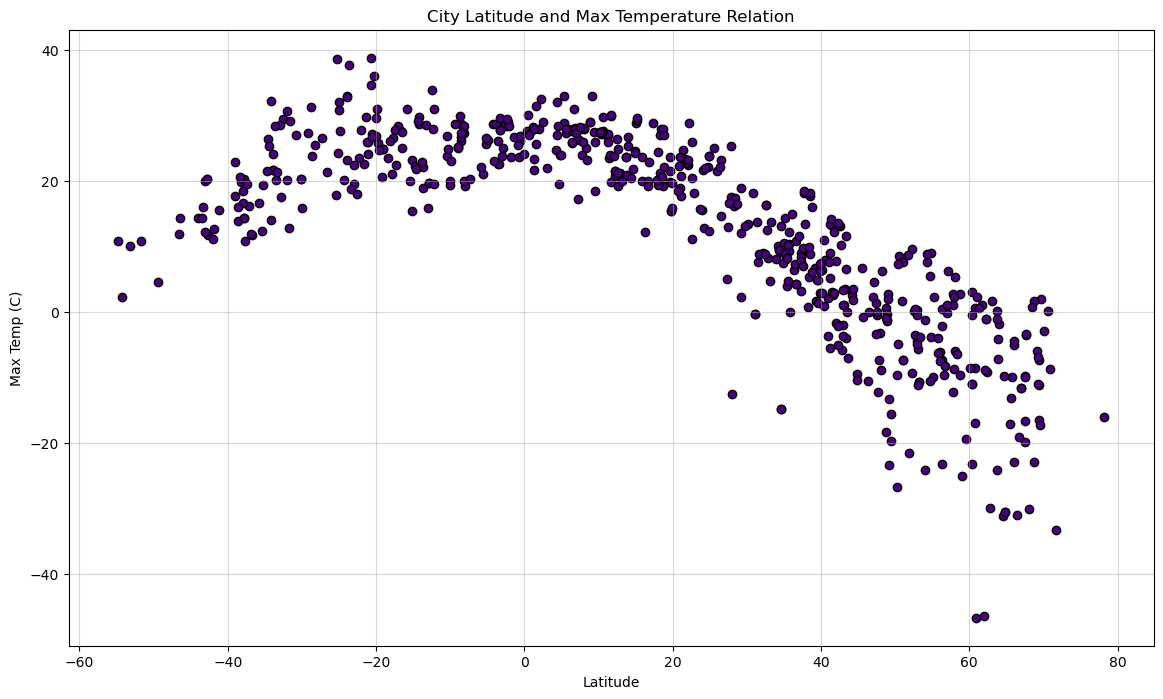

In [36]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(14,8))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], 
            edgecolor="black", linewidths=1, marker="o", color="indigo"
)
# Incorporate the other graph properties
plt.title("City Latitude and Max Temperature Relation")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid(alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

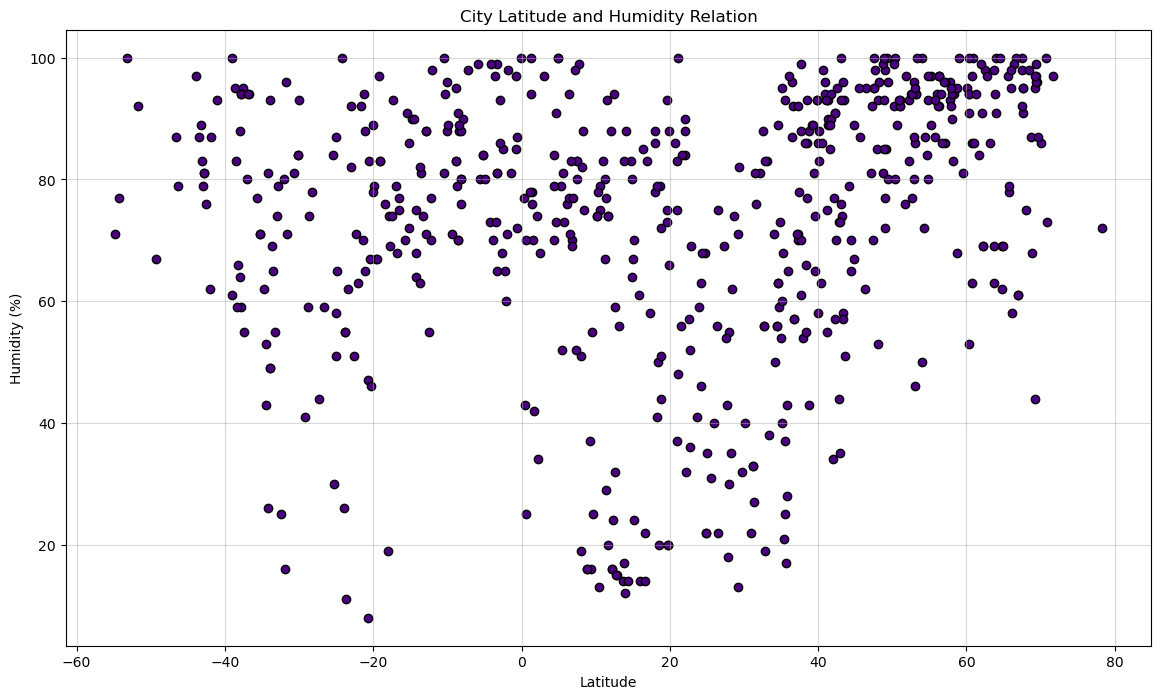

<Figure size 640x480 with 0 Axes>

In [37]:
# Build scatter plot for latitude vs. Humidity
plt.figure(figsize=(14,8))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], 
            edgecolor="black", linewidths=1, marker="o", color="indigo"
)
# Incorporate the other graph properties
plt.title("City Latitude and Humidity Relation")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha = 0.5)

# Show plot
plt.show()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

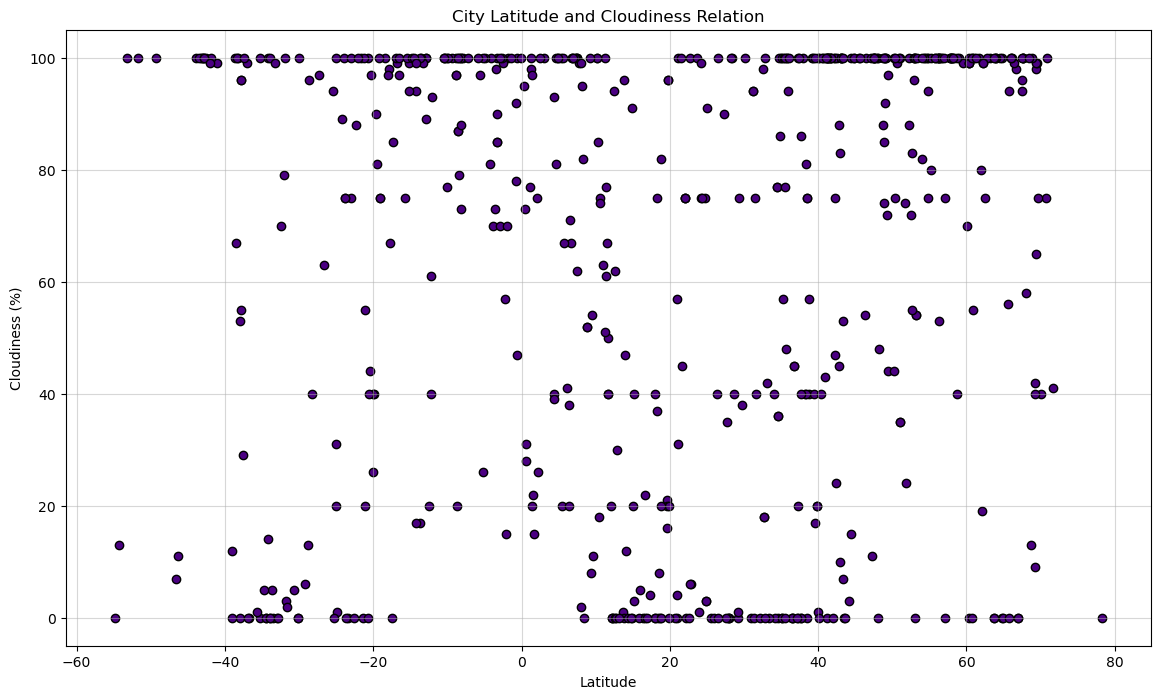

In [38]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(14,8))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], 
            edgecolor="black", linewidths=1, marker="o", color="indigo"
)
# Incorporate the other graph properties
plt.title("City Latitude and Cloudiness Relation")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

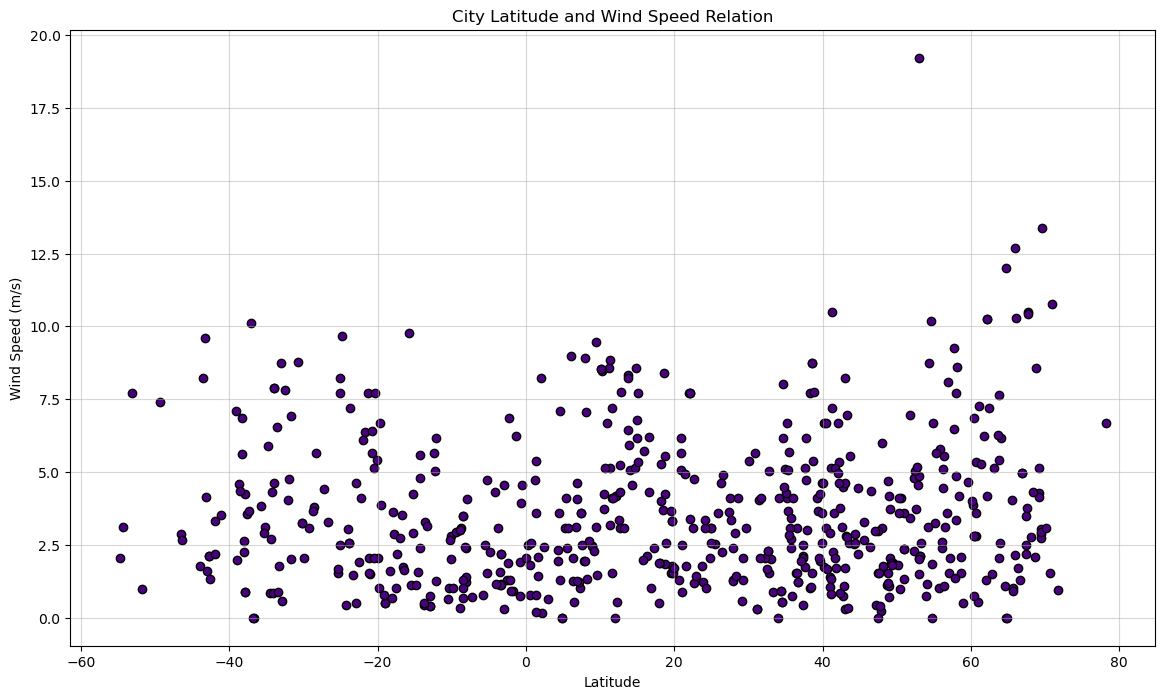

In [39]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(14,8))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], 
            edgecolor="black", linewidths=1, marker="o", color="indigo"
)
# Incorporate the other graph properties
plt.title("City Latitude and Wind Speed Relation")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
#Thanks ChatGPT for some assistance :)
def plot_linear_regression(x, y, ylabel = "Y-axis", title = "Regression Plot"):
    # Convert input to numpy arrays for processing
    x = np.array(x)
    y = np.array(y)

    # Perform linear regression using scipy
    (slope, intercept, r_value, p_value, std_err) = sc.linregress(x, y)

    # Print regression details using pprint
    r_val2 = {"r_value^2": r_value**2}

    # Create a scatter plot with the regression line
    plt.figure(figsize=(14, 8))
    sns.scatterplot(x=x, y=y, color="indigo", label="Data Points")
    plt.plot(x, slope * x + intercept, color="red", label=f"Regression Line (y={slope:.2f}x + {intercept:.2f})")

    # Add labels, title, and legend
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

    # Display the plot
    plt.show()

    return r_val2


In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
north_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Ménaka,15.9182,2.4022,20.01,14,5,5.73,ML,1735544124
3,Fort Stockton,30.8940,-102.8793,18.20,22,0,5.66,US,1735544127
5,Smithers,54.7804,-127.1743,-3.82,93,100,0.00,CA,1735544106
6,Utrik,11.2278,169.8474,27.05,80,100,8.57,MH,1735544131
8,La Cruz,23.9167,-106.9000,15.59,59,1,1.23,MX,1735544133


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Port Augusta,-32.5000,137.7667,29.57,25,70,7.82,AU,1735544123
2,Puerto Ayora,-0.7393,-90.3518,23.64,97,78,1.90,EC,1735544126
4,Codrington,-38.2667,141.9667,19.93,66,100,6.84,AU,1735544128
7,Waitangi,-43.9535,-176.5597,14.34,97,100,1.79,NZ,1735544132
14,Koné,-21.0595,164.8658,25.97,65,55,1.50,NC,1735544140


###  Temperature vs. Latitude Linear Regression Plot

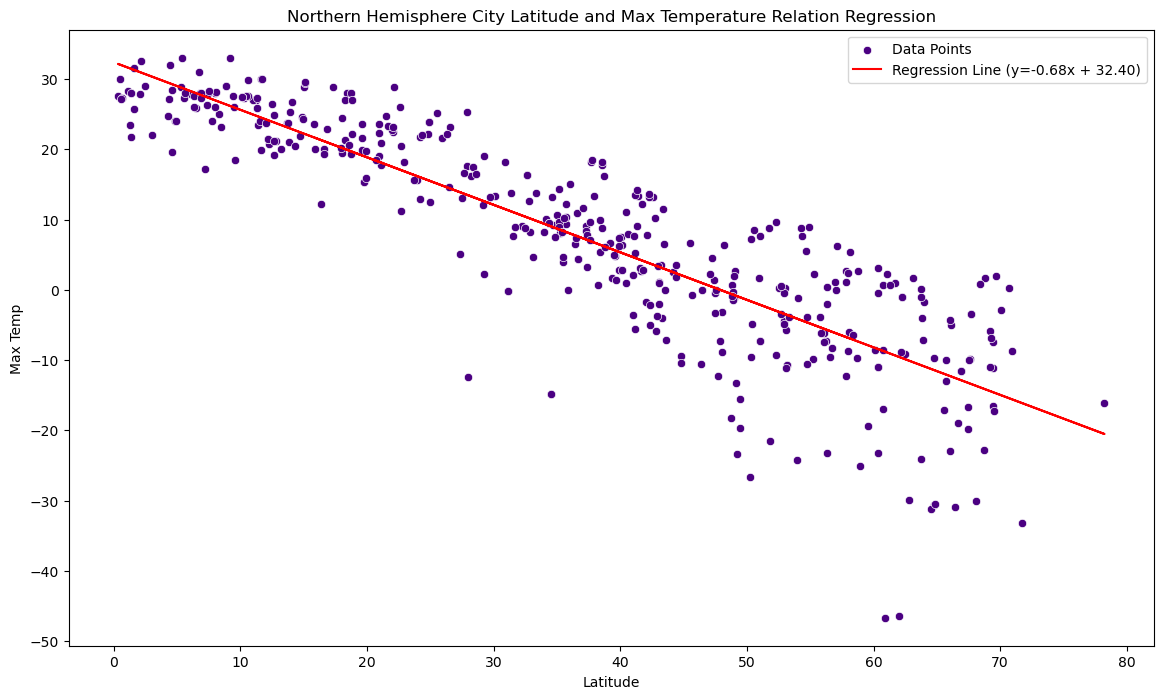

{'r_value^2': 0.7578768886395716}

In [43]:
# Linear regression on Northern Hemisphere
x = north_hemi_df["Lat"]
y = north_hemi_df["Max Temp"]
plot_linear_regression(x, y, "Max Temp","Northern Hemisphere City Latitude and Max Temperature Relation Regression")

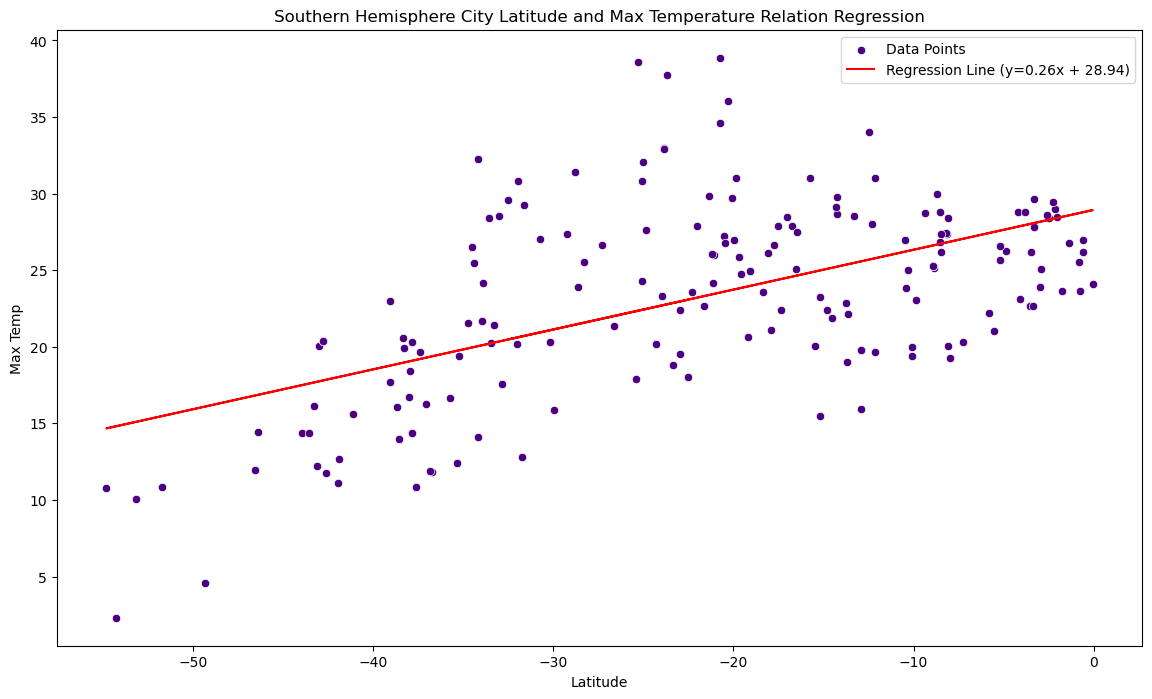

{'r_value^2': 0.3206527084644369}

In [44]:
# Linear regression on Southern Hemisphere
x = south_hemi_df["Lat"]
y = south_hemi_df["Max Temp"]
plot_linear_regression(x, y, "Max Temp","Southern Hemisphere City Latitude and Max Temperature Relation Regression")

**Discussion about the linear relationship:**  Both R^2 values of the two regression plots of temperature show a moderately strong relationship between the two variables of latitude and max temperature. The average of both R^2 values sits at around 0.53, which means there is a moderate strength in the correlation between the two variables.

### Humidity vs. Latitude Linear Regression Plot

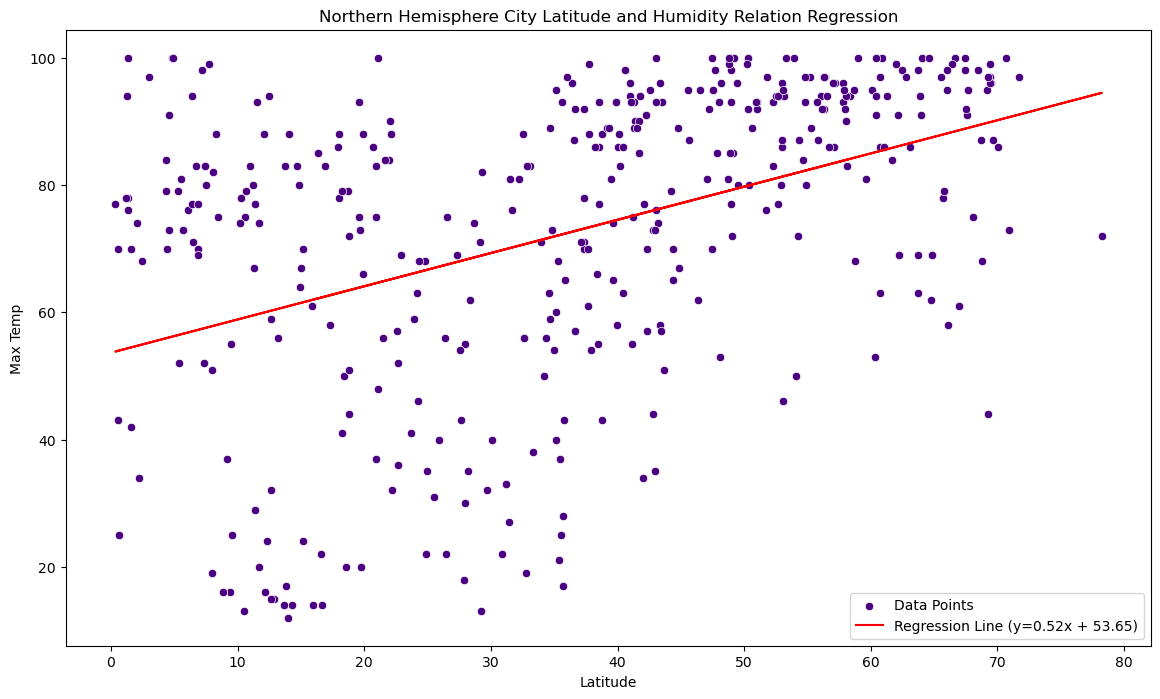

{'r_value^2': 0.18662214906627123}

In [45]:
# Northern Hemisphere
x = north_hemi_df["Lat"]
y = north_hemi_df["Humidity"]
plot_linear_regression(x, y, "Max Temp","Northern Hemisphere City Latitude and Humidity Relation Regression")

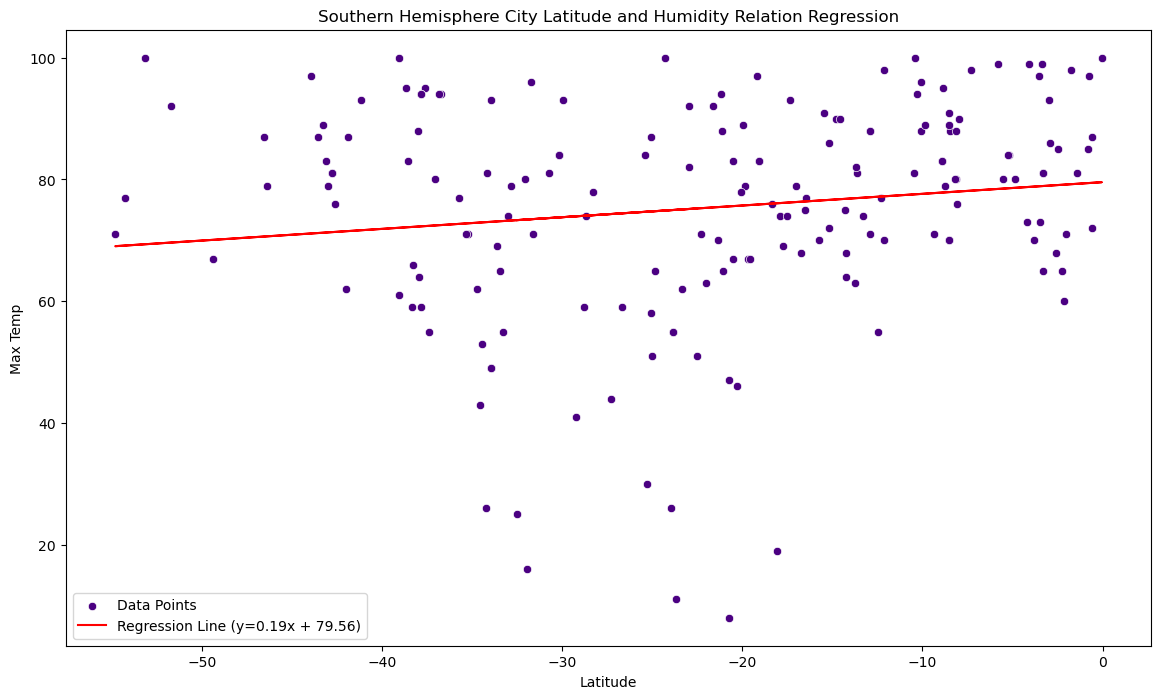

{'r_value^2': 0.021007050449354712}

In [46]:
# Southern Hemisphere
x = south_hemi_df["Lat"]
y = south_hemi_df["Humidity"]
plot_linear_regression(x, y, "Max Temp","Southern Hemisphere City Latitude and Humidity Relation Regression")

**Discussion about the linear relationship:** Both plots show a low corrlation and low r^2 value that reflects a very weak relationship. Based off of this dataset, there is no relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

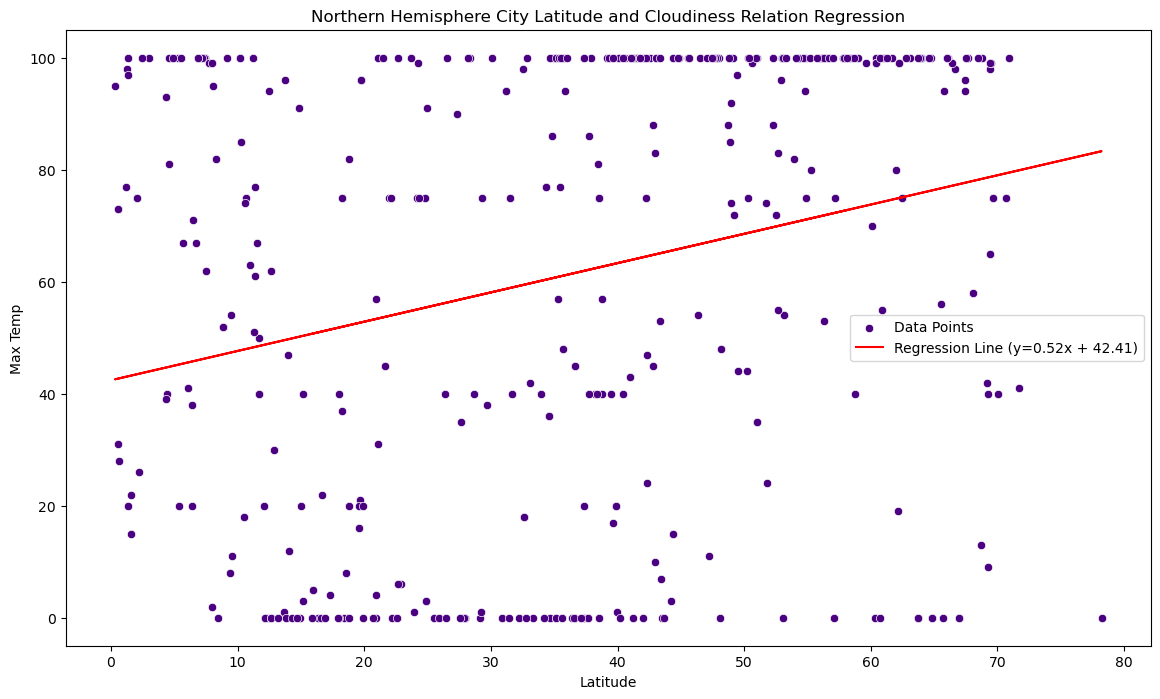

{'r_value^2': 0.06727701137776389}

In [47]:
# Northern Hemisphere
x = north_hemi_df["Lat"]
y = north_hemi_df["Cloudiness"]
plot_linear_regression(x, y, "Max Temp","Northern Hemisphere City Latitude and Cloudiness Relation Regression")

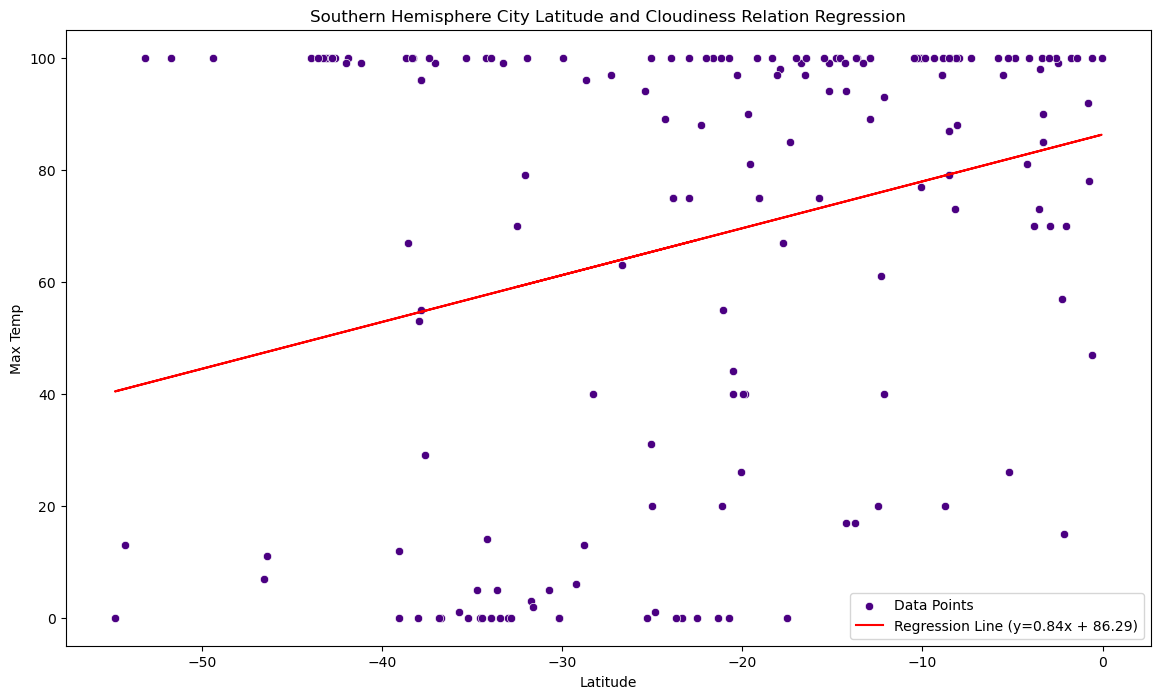

{'r_value^2': 0.08614187994353191}

In [48]:
# Southern Hemisphere
x = south_hemi_df["Lat"]
y = south_hemi_df["Cloudiness"]
plot_linear_regression(x, y, "Max Temp","Southern Hemisphere City Latitude and Cloudiness Relation Regression")

**Discussion about the linear relationship:** Both plots show a low corrlation and low r^2 value that reflects a very weak relationship. Based off of this dataset, there is no relationship between latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

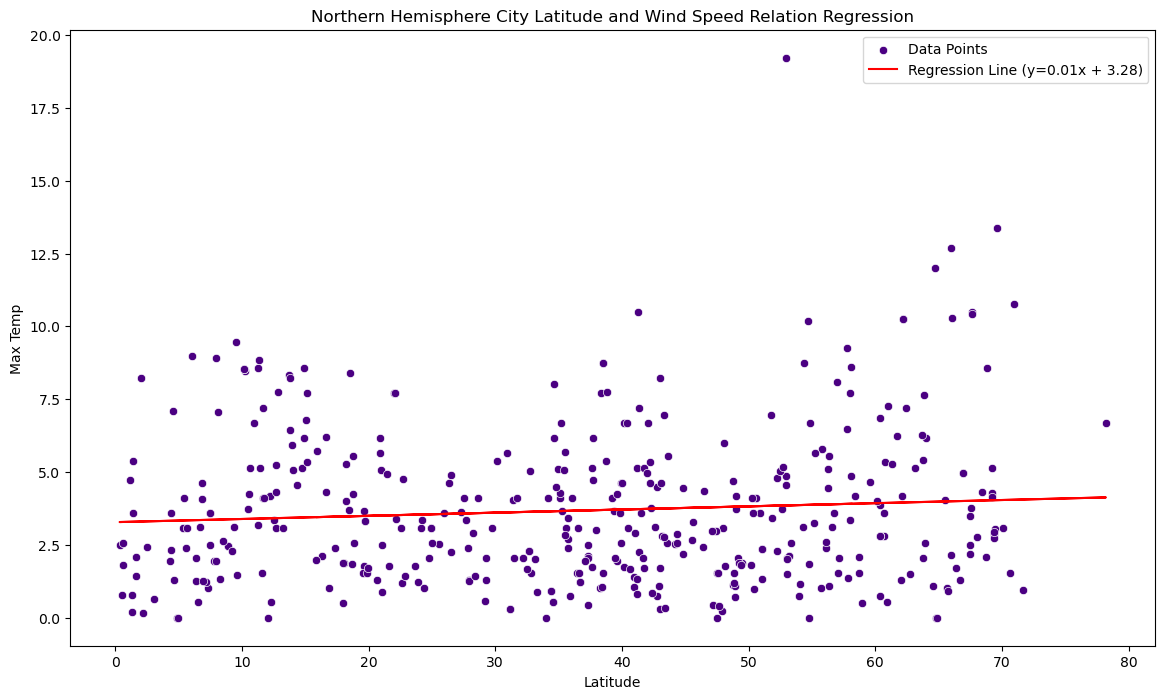

{'r_value^2': 0.006772399418090549}

In [49]:
# Northern Hemisphere
x = north_hemi_df["Lat"]
y = north_hemi_df["Wind Speed"]
plot_linear_regression(x, y, "Max Temp","Northern Hemisphere City Latitude and Wind Speed Relation Regression")

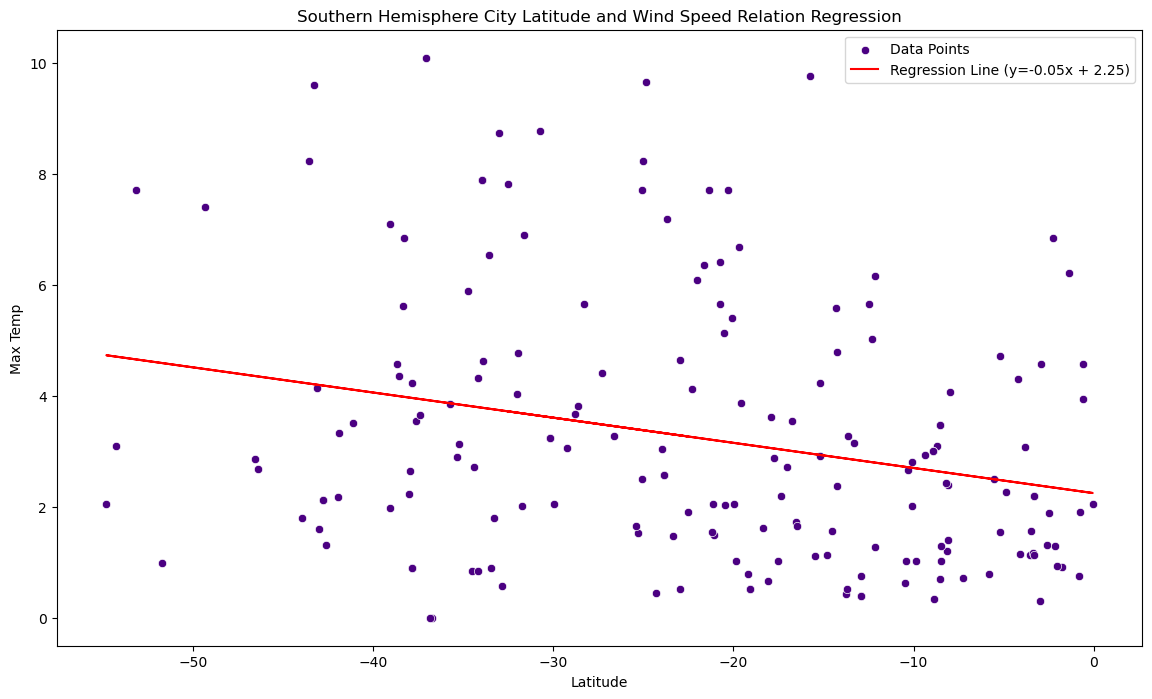

{'r_value^2': 0.06914707760673774}

In [50]:
# Southern Hemisphere
x = south_hemi_df["Lat"]
y = south_hemi_df["Wind Speed"]
plot_linear_regression(x, y, "Max Temp","Southern Hemisphere City Latitude and Wind Speed Relation Regression")

**Discussion about the linear relationship:** Both plots show a low corrlation and low r^2 value that reflects a very weak relationship. Based off of this dataset, there is no relationship between latitude and Wind Speed.